# <center>________________________________________________________________</center>

# <center>ANALYSIS OF CHICAGO PUBLIC DATASETS</center>

# <center>________________________________________________________________</center>

## Datasets
***

### 1. Socioeconomic Indicators in Chicago (2008-2012)

The city of Chicago released a dataset of socioeconomic data to the Chicago City Portal.
This dataset contains a selection of six socioeconomic indicators of public health significance and a “hardship index,” for each Chicago community area, for the years 2008 – 2012.

Scores on the hardship index can range from 1 to 100, with a higher index number representing a greater level of hardship.

A detailed description of the dataset can be found on [the city of Chicago's website](https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2), but to summarize, the dataset has the following variables:

*   **Community Area Number** (`ca`): Used to uniquely identify each row of the dataset

*   **Community Area Name** (`community_area_name`): The name of the region in the city of Chicago

*   **Percent of Housing Crowded** (`percent_of_housing_crowded`): Percent of occupied housing units with more than one person per room

*   **Percent Households Below Poverty** (`percent_households_below_poverty`): Percent of households living below the federal poverty line

*   **Percent Aged 16+ Unemployed** (`percent_aged_16_unemployed`): Percent of persons over the age of 16 years that are unemployed

*   **Percent Aged 25+ without High School Diploma** (`percent_aged_25_without_high_school_diploma`): Percent of persons over the age of 25 years without a high school education

*   **Percent Aged Under** 18 or Over 64:Percent of population under 18 or over 64 years of age (`percent_aged_under_18_or_over_64`): (ie. dependents)

*   **Per Capita Income** (`per_capita_income_`): Community Area per capita income is estimated as the sum of tract-level aggragate incomes divided by the total population

*   **Hardship Index** (`hardship_index`): Score that incorporates each of the six selected socioeconomic indicators

### 2. Chicago Public Schools - Progress Report Cards (2011-2012)

The city of Chicago released a dataset showing all school level performance data used to create School Report Cards for the 2011-2012 school year. The dataset is available from the Chicago Data Portal: [https://data.cityofchicago.org/Education/Chicago-Public-Schools-Progress-Report-Cards-2011-/9xs2-f89t](https://data.cityofchicago.org/Education/Chicago-Public-Schools-Progress-Report-Cards-2011-/9xs2-f89t)

This dataset includes a large number of metrics. The glossary can be found [here](https://data.cityofchicago.org/api/assets/AAD41A13-BE8A-4E67-B1F5-86E711E09D5F?download=true).

### 3. Chicago Crime Data (2001-Present)

This dataset reflects reported incidents of crime (with the exception of murders where data exists for each victim) that occurred in the City of Chicago from 2001 to present, minus the most recent seven days.

A detailed description of this dataset and the original dataset can be obtained from the Chicago Data Portal at:
[https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2)

### Download the datasets

We will download the datasets from the links below, instead of directly from the Chicago Data Portal. The versions linked here are subsets of the original datasets and have some of the column names modified to be more database friendly. This way we can focus precisely on SQL queries instead of data wrangling.

*   <a href="https://github.com/efeyemez/Portfolio/blob/main/Datasets/Chicago_Public_Datasets/ChicagoCensusData.csv" target="_blank">Chicago Census Data</a>

*   <a href="https://github.com/efeyemez/Portfolio/blob/main/Datasets/Chicago_Public_Datasets/ChicagoPublicSchools.csv" target="_blank">Chicago Public Schools</a>

*   <a href="https://github.com/efeyemez/Portfolio/blob/main/Datasets/Chicago_Public_Datasets/ChicagoCrimeData.csv" target="_blank">Chicago Crime Data</a>

## Libraries
***

In [ ]:
#!pip install pandas
#!pip install sqlalchemy
#!pip install sqlite3
#!pip install ipython-sql
#!pip install matplotlib
#!pip install seaborn

In [1]:
import csv, sqlite3
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Creating and Connecting to Database
***

In [2]:
%load_ext sql

In [3]:
con = sqlite3.connect("chicago.db")
cur = con.cursor()

In [4]:
%sql sqlite:///chicago.db

## Data Acquisation
***

In [5]:
df_census = pd.read_csv('https://github.com/efeyemez/Portfolio/raw/main/Datasets/Chicago_Public_Datasets/ChicagoCensusData.csv')
print(df_census.shape)
df_census.head(3)

(78, 9)


,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,PERCENT_OF_HOUSING_CROWDED,PERCENT_HOUSEHOLDS_BELOW_POVERTY,PERCENT_AGED_16__UNEMPLOYED,PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA,PERCENT_AGED_UNDER_18_OR_OVER_64,PER_CAPITA_INCOME,HARDSHIP_INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939.0,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040.0,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787.0,20.0


In [6]:
df_schools = pd.read_csv('https://github.com/efeyemez/Portfolio/raw/main/Datasets/Chicago_Public_Datasets/ChicagoPublicSchools.csv')
print(df_schools.shape)
df_schools.head(3)

(566, 78)


,School_ID,NAME_OF_SCHOOL,School_Type,Street_Address,City,State,ZIP_Code,Phone_Number,Link,Network_Manager,...,Freshman_on_Track_Rate__,X_COORDINATE,Y_COORDINATE,Latitude,Longitude,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,Ward,Police_District,Location
0,610038,Abraham Lincoln Elementary School,ES,615 W Kemper Pl,Chicago,IL,60614,(773) 534-5720,http://schoolreports.cps.edu/SchoolProgressRep...,Fullerton Elementary Network,...,NDA,1171699.458,1915829.428,41.924497,-87.644522,7,LINCOLN PARK,43,18,"(41.92449696, -87.64452163)"
1,610281,Adam Clayton Powell Paideia Community Academy ...,ES,7511 S South Shore Dr,Chicago,IL,60649,(773) 535-6650,http://schoolreports.cps.edu/SchoolProgressRep...,Skyway Elementary Network,...,NDA,1196129.985,1856209.466,41.760324,-87.556736,43,SOUTH SHORE,7,4,"(41.76032435, -87.55673627)"
2,610185,Adlai E Stevenson Elementary School,ES,8010 S Kostner Ave,Chicago,IL,60652,(773) 535-2280,http://schoolreports.cps.edu/SchoolProgressRep...,Midway Elementary Network,...,NDA,1148427.165,1851012.215,41.747111,-87.731702,70,ASHBURN,13,8,"(41.74711093, -87.73170248)"


In [7]:
df_crime = pd.read_csv('https://github.com/efeyemez/Portfolio/raw/main/Datasets/Chicago_Public_Datasets/ChicagoCrimeData.csv')
print(df_schools.shape)
df_schools.head(3)

(566, 78)


,School_ID,NAME_OF_SCHOOL,School_Type,Street_Address,City,State,ZIP_Code,Phone_Number,Link,Network_Manager,...,Freshman_on_Track_Rate__,X_COORDINATE,Y_COORDINATE,Latitude,Longitude,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,Ward,Police_District,Location
0,610038,Abraham Lincoln Elementary School,ES,615 W Kemper Pl,Chicago,IL,60614,(773) 534-5720,http://schoolreports.cps.edu/SchoolProgressRep...,Fullerton Elementary Network,...,NDA,1171699.458,1915829.428,41.924497,-87.644522,7,LINCOLN PARK,43,18,"(41.92449696, -87.64452163)"
1,610281,Adam Clayton Powell Paideia Community Academy ...,ES,7511 S South Shore Dr,Chicago,IL,60649,(773) 535-6650,http://schoolreports.cps.edu/SchoolProgressRep...,Skyway Elementary Network,...,NDA,1196129.985,1856209.466,41.760324,-87.556736,43,SOUTH SHORE,7,4,"(41.76032435, -87.55673627)"
2,610185,Adlai E Stevenson Elementary School,ES,8010 S Kostner Ave,Chicago,IL,60652,(773) 535-2280,http://schoolreports.cps.edu/SchoolProgressRep...,Midway Elementary Network,...,NDA,1148427.165,1851012.215,41.747111,-87.731702,70,ASHBURN,13,8,"(41.74711093, -87.73170248)"


## Importing Datasets into the Database
***

In [8]:
df_census.to_sql("CENSUS_DATA", con, if_exists='replace', index=False, method="multi")
df_schools.to_sql("CHICAGO_PUBLIC_SCHOOLS", con, if_exists='replace', index=False, method="multi")
df_crime.to_sql("CHICAGO_CRIME_DATA", con, if_exists='replace', index=False, method="multi")

533

The database system catalog:

In [9]:
%sql SELECT name FROM sqlite_master WHERE type='table';

 * sqlite:///chicago.db
Done.


name
CENSUS_DATA
CHICAGO_PUBLIC_SCHOOLS
CHICAGO_CRIME_DATA


# QUERIES FOR CENSUS DATA
***

## Column metadata

In [10]:
%sql SELECT name,type,length(type) FROM PRAGMA_TABLE_INFO('CENSUS_DATA') LIMIT 5;

 * sqlite:///chicago.db
Done.


name,type,length(type)
COMMUNITY_AREA_NUMBER,REAL,4
COMMUNITY_AREA_NAME,TEXT,4
PERCENT_OF_HOUSING_CROWDED,REAL,4
PERCENT_HOUSEHOLDS_BELOW_POVERTY,REAL,4
PERCENT_AGED_16__UNEMPLOYED,REAL,4


## How many records are in the dataset?

In [11]:
%sql SELECT COUNT(*) FROM CENSUS_DATA;

 * sqlite:///chicago.db
Done.


COUNT(*)
78


## What is the maximum value of hardship index in the dataset?

In [12]:
%sql SELECT MAX(HARDSHIP_INDEX) FROM CENSUS_DATA;

 * sqlite:///chicago.db
Done.


MAX(HARDSHIP_INDEX)
98.0


## Which community area has the highest hardship index? (with a sub-query)

In [13]:
%%sql SELECT COMMUNITY_AREA_NAME, HARDSHIP_INDEX FROM CENSUS_DATA
        WHERE HARDSHIP_INDEX = (SELECT MAX(HARDSHIP_INDEX) FROM CENSUS_DATA)

 * sqlite:///chicago.db
Done.


COMMUNITY_AREA_NAME,HARDSHIP_INDEX
Riverdale,98.0


## How many community areas have a hardship index greater than 50?

In [14]:
%sql SELECT COUNT(*) FROM CENSUS_DATA WHERE HARDSHIP_INDEX > 50.0;

 * sqlite:///chicago.db
Done.


COUNT(*)
38


## Which community areas have per-capita income greater than $60,000?

In [15]:
%sql SELECT COMMUNITY_AREA_NAME FROM CENSUS_DATA WHERE PER_CAPITA_INCOME > 60000;

 * sqlite:///chicago.db
Done.


COMMUNITY_AREA_NAME
Lake View
Lincoln Park
Near North Side
Loop


## Which community areas have per capita income less than $11,000?

In [16]:
%%sql SELECT COMMUNITY_AREA_NAME, PER_CAPITA_INCOME FROM CENSUS_DATA
        WHERE PER_CAPITA_INCOME < 11000;

 * sqlite:///chicago.db
Done.


COMMUNITY_AREA_NAME,PER_CAPITA_INCOME
West Garfield Park,10934.0
South Lawndale,10402.0
Fuller Park,10432.0
Riverdale,8201.0


## List 5 community areas with highest % of households below poverty line

In [17]:
%%sql SELECT COMMUNITY_AREA_NAME, PERCENT_HOUSEHOLDS_BELOW_POVERTY FROM CENSUS_DATA
        ORDER BY PERCENT_HOUSEHOLDS_BELOW_POVERTY DESC LIMIT 5;

 * sqlite:///chicago.db
Done.


COMMUNITY_AREA_NAME,PERCENT_HOUSEHOLDS_BELOW_POVERTY
Riverdale,56.5
Fuller Park,51.2
Englewood,46.6
North Lawndale,43.1
East Garfield Park,42.4


## Scatter plot of per-capita income and hardship_index

 * sqlite:///chicago.db
Done.


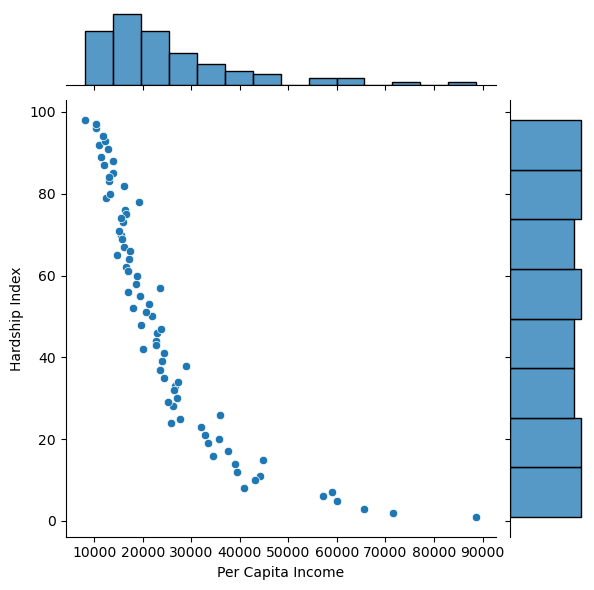

In [18]:
income_vs_hardship = %sql SELECT PER_CAPITA_INCOME, HARDSHIP_INDEX FROM CENSUS_DATA;

fig = sns.jointplot(x='PER_CAPITA_INCOME', y='HARDSHIP_INDEX', data=income_vs_hardship.DataFrame())

fig.set_axis_labels("Per Capita Income", "Hardship Index")

# Display the plot
plt.show()

## Scatter plot of per-capita income and percent households below poverty

 * sqlite:///chicago.db
Done.


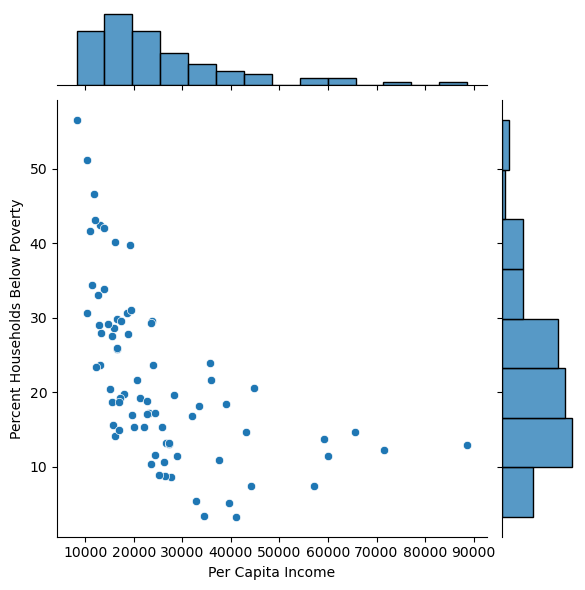

In [19]:
income_vs_poverty = %sql SELECT PER_CAPITA_INCOME, PERCENT_HOUSEHOLDS_BELOW_POVERTY FROM CENSUS_DATA;

fig = sns.jointplot(x='PER_CAPITA_INCOME',y='PERCENT_HOUSEHOLDS_BELOW_POVERTY', data=income_vs_poverty.DataFrame())

fig.set_axis_labels("Per Capita Income", "Percent Households Below Poverty")

# Display the plot
plt.show()

## Scatter plot of per-capita income and percent aged 16+ unemployed

 * sqlite:///chicago.db
Done.


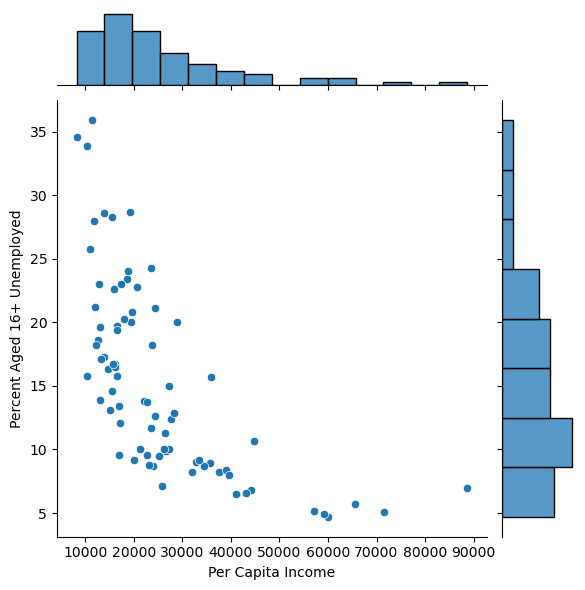

In [20]:
income_vs_plus16 = %sql SELECT PER_CAPITA_INCOME, PERCENT_AGED_16__UNEMPLOYED FROM CENSUS_DATA;

fig = sns.jointplot(x='PER_CAPITA_INCOME',y='PERCENT_AGED_16__UNEMPLOYED', data=income_vs_plus16.DataFrame())

fig.set_axis_labels("Per Capita Income", "Percent Aged 16+ Unemployed")

# Display the plot
plt.show()

# QUERIES FOR PUBLIC SCHOOLS DATA
***

## Column metadata

In [21]:
%sql SELECT name,type,length(type) FROM PRAGMA_TABLE_INFO('CHICAGO_PUBLIC_SCHOOLS') LIMIT 5;

 * sqlite:///chicago.db
Done.


name,type,length(type)
School_ID,INTEGER,7
NAME_OF_SCHOOL,TEXT,4
School_Type,TEXT,4
Street_Address,TEXT,4
City,TEXT,4


## What is the highest "Safety Score"?

In [22]:
%sql SELECT MAX(SAFETY_SCORE) AS MAX_SAFETY_SCORE FROM CHICAGO_PUBLIC_SCHOOLS;

 * sqlite:///chicago.db
Done.


MAX_SAFETY_SCORE
99.0


## Which schools have highest "Safety Score"?

In [23]:
%%sql SELECT NAME_OF_SCHOOL, SAFETY_SCORE FROM CHICAGO_PUBLIC_SCHOOLS
        WHERE SAFETY_SCORE = (SELECT MAX(SAFETY_SCORE) FROM CHICAGO_PUBLIC_SCHOOLS);

 * sqlite:///chicago.db
Done.


NAME_OF_SCHOOL,SAFETY_SCORE
Abraham Lincoln Elementary School,99.0
Alexander Graham Bell Elementary School,99.0
Annie Keller Elementary Gifted Magnet School,99.0
Augustus H Burley Elementary School,99.0
Edgar Allan Poe Elementary Classical School,99.0
Edgebrook Elementary School,99.0
Ellen Mitchell Elementary School,99.0
James E McDade Elementary Classical School,99.0
James G Blaine Elementary School,99.0
LaSalle Elementary Language Academy,99.0


## What are the 5 schools with lowest "Safety Score"?

In [24]:
%%sql SELECT NAME_OF_SCHOOL, SAFETY_SCORE FROM CHICAGO_PUBLIC_SCHOOLS
        ORDER BY SAFETY_SCORE NULLS LAST LIMIT 5

 * sqlite:///chicago.db
Done.


NAME_OF_SCHOOL,SAFETY_SCORE
Edmond Burke Elementary School,1.0
Luke O'Toole Elementary School,5.0
George W Tilton Elementary School,6.0
Foster Park Elementary School,11.0
Emil G Hirsch Metropolitan High School,13.0


## List the average safety score for each type of school.

In [25]:
%%sql SELECT School_Type, AVG(SAFETY_SCORE) AS Average_Safety_Score FROM CHICAGO_PUBLIC_SCHOOLS
        GROUP BY School_Type;

 * sqlite:///chicago.db
Done.


School_Type,Average_Safety_Score
ES,49.52038369304557
HS,49.62352941176471
MS,48.0


## How many elementary schools are in the dataset?

In [26]:
%sql SELECT COUNT(*) FROM CHICAGO_PUBLIC_SCHOOLS WHERE "School_Type" = 'ES';

 * sqlite:///chicago.db
Done.


COUNT(*)
462


## What are the top 10 schools with the highest "Average Student Attendance"?

In [27]:
%%sql SELECT NAME_OF_SCHOOL, AVERAGE_STUDENT_ATTENDANCE FROM CHICAGO_PUBLIC_SCHOOLS
        ORDER BY AVERAGE_STUDENT_ATTENDANCE DESC NULLS LAST LIMIT 10;

 * sqlite:///chicago.db
Done.


NAME_OF_SCHOOL,AVERAGE_STUDENT_ATTENDANCE
John Charles Haines Elementary School,98.40%
James Ward Elementary School,97.80%
Edgar Allan Poe Elementary Classical School,97.60%
Orozco Fine Arts & Sciences Elementary School,97.60%
Rachel Carson Elementary School,97.60%
Annie Keller Elementary Gifted Magnet School,97.50%
Andrew Jackson Elementary Language Academy,97.40%
Lenart Elementary Regional Gifted Center,97.40%
Disney II Magnet School,97.30%
John H Vanderpoel Elementary Magnet School,97.20%


## What are the bottom 5 Schools with the lowest "Average Student Attendance"?

In [28]:
%%sql SELECT NAME_OF_SCHOOL, AVERAGE_STUDENT_ATTENDANCE FROM CHICAGO_PUBLIC_SCHOOLS
        ORDER BY AVERAGE_STUDENT_ATTENDANCE ASC NULLS LAST LIMIT 5;

 * sqlite:///chicago.db
Done.


NAME_OF_SCHOOL,AVERAGE_STUDENT_ATTENDANCE
Richard T Crane Technical Preparatory High School,57.90%
Barbara Vick Early Childhood & Family Center,60.90%
Dyett High School,62.50%
Wendell Phillips Academy High School,63.00%
Orr Academy High School,66.30%


## Remove the '%' sign from the above result set for "Average Student Attendance" column

In [29]:
%%sql SELECT NAME_OF_SCHOOL, REPLACE(AVERAGE_STUDENT_ATTENDANCE, '%', '') AS 'Average Student Attendance (%)' FROM CHICAGO_PUBLIC_SCHOOLS
        ORDER BY AVERAGE_STUDENT_ATTENDANCE ASC NULLS LAST LIMIT 5;

 * sqlite:///chicago.db
Done.


NAME_OF_SCHOOL,Average Student Attendance (%)
Richard T Crane Technical Preparatory High School,57.90
Barbara Vick Early Childhood & Family Center,60.90
Dyett High School,62.50
Wendell Phillips Academy High School,63.00
Orr Academy High School,66.30


## Which schools have "Average Student Attendance" lower than 70%?

In [30]:
%%sql SELECT NAME_OF_SCHOOL, AVERAGE_STUDENT_ATTENDANCE FROM CHICAGO_PUBLIC_SCHOOLS
        WHERE CAST(REPLACE(AVERAGE_STUDENT_ATTENDANCE, '%', '') AS DOUBLE) < 70
        ORDER BY AVERAGE_STUDENT_ATTENDANCE;

 * sqlite:///chicago.db
Done.


NAME_OF_SCHOOL,AVERAGE_STUDENT_ATTENDANCE
Richard T Crane Technical Preparatory High School,57.90%
Barbara Vick Early Childhood & Family Center,60.90%
Dyett High School,62.50%
Wendell Phillips Academy High School,63.00%
Orr Academy High School,66.30%
Manley Career Academy High School,66.80%
Chicago Vocational Career Academy High School,68.80%
Roberto Clemente Community Academy High School,69.60%


## What is the total "College Enrollment" for each community area? (show 5)

In [31]:
%%sql SELECT COMMUNITY_AREA_NAME, SUM(COLLEGE_ENROLLMENT) AS TOTAL_ENROLLMENT FROM CHICAGO_PUBLIC_SCHOOLS
        GROUP BY COMMUNITY_AREA_NAME LIMIT 5;

 * sqlite:///chicago.db
Done.


COMMUNITY_AREA_NAME,TOTAL_ENROLLMENT
ALBANY PARK,6864
ARCHER HEIGHTS,4823
ARMOUR SQUARE,1458
ASHBURN,6483
AUBURN GRESHAM,4175


## What are the 5 community areas with the least total "College Enrollment"? (sorted in ascending order)

In [32]:
%%sql SELECT COMMUNITY_AREA_NAME, SUM(COLLEGE_ENROLLMENT) AS TOTAL_ENROLLMENT FROM CHICAGO_PUBLIC_SCHOOLS
        GROUP BY COMMUNITY_AREA_NAME ORDER BY TOTAL_ENROLLMENT ASC LIMIT 5;

 * sqlite:///chicago.db
Done.


COMMUNITY_AREA_NAME,TOTAL_ENROLLMENT
OAKLAND,140
FULLER PARK,531
BURNSIDE,549
OHARE,786
LOOP,871


# QUERIES FOR CRIME DATA
***

## Column metadata

In [33]:
%sql SELECT name,type,length(type) FROM PRAGMA_TABLE_INFO('CHICAGO_CRIME_DATA') LIMIT 5;

 * sqlite:///chicago.db
Done.


name,type,length(type)
ID,INTEGER,7
CASE_NUMBER,TEXT,4
DATE,TEXT,4
BLOCK,TEXT,4
IUCR,TEXT,4


## What is the total number of crimes recorded in the table?

In [34]:
%sql SELECT DISTINCT(COUNT(ID)) FROM CHICAGO_CRIME_DATA;

 * sqlite:///chicago.db
Done.


(COUNT(ID))
533


## What are the case numbers for crimes involving minors? (children are not considered minors for the purposes of crime analysis)

In [35]:
%%sql SELECT CASE_NUMBER, PRIMARY_TYPE, DESCRIPTION FROM CHICAGO_CRIME_DATA
        WHERE PRIMARY_TYPE LIKE '%MINOR%' OR DESCRIPTION LIKE '%MINOR%';

 * sqlite:///chicago.db
Done.


CASE_NUMBER,PRIMARY_TYPE,DESCRIPTION
HL266884,LIQUOR LAW VIOLATION,SELL/GIVE/DEL LIQUOR TO MINOR
HK238408,LIQUOR LAW VIOLATION,ILLEGAL CONSUMPTION BY MINOR


## What are the kidnapping crimes involving a child?

In [36]:
%%sql SELECT * FROM CHICAGO_CRIME_DATA
        WHERE PRIMARY_TYPE LIKE '%KIDNAP%' AND DESCRIPTION LIKE '%CHILD%';

 * sqlite:///chicago.db
Done.


ID,CASE_NUMBER,DATE,BLOCK,IUCR,PRIMARY_TYPE,DESCRIPTION,LOCATION_DESCRIPTION,ARREST,DOMESTIC,BEAT,DISTRICT,WARD,COMMUNITY_AREA_NUMBER,FBICODE,X_COORDINATE,Y_COORDINATE,YEAR,LATITUDE,LONGITUDE,LOCATION
5276766,HN144152,2007-01-26,050XX W VAN BUREN ST,1792,KIDNAPPING,CHILD ABDUCTION/STRANGER,STREET,0,0,1533,15,29.0,25.0,20,1143050.0,1897546.0,2007,41.87490841,-87.75024931,"(41.874908413, -87.750249307)"


## What kinds of crimes were recorded at schools?

In [37]:
%%sql SELECT DISTINCT(PRIMARY_TYPE), LOCATION_DESCRIPTION FROM CHICAGO_CRIME_DATA
        WHERE LOCATION_DESCRIPTION LIKE '%SCHOOL%';

 * sqlite:///chicago.db
Done.


PRIMARY_TYPE,LOCATION_DESCRIPTION
BATTERY,"SCHOOL, PUBLIC, GROUNDS"
BATTERY,"SCHOOL, PUBLIC, BUILDING"
CRIMINAL DAMAGE,"SCHOOL, PUBLIC, GROUNDS"
NARCOTICS,"SCHOOL, PUBLIC, GROUNDS"
NARCOTICS,"SCHOOL, PUBLIC, BUILDING"
ASSAULT,"SCHOOL, PUBLIC, GROUNDS"
CRIMINAL TRESPASS,"SCHOOL, PUBLIC, GROUNDS"
PUBLIC PEACE VIOLATION,"SCHOOL, PRIVATE, BUILDING"
PUBLIC PEACE VIOLATION,"SCHOOL, PUBLIC, BUILDING"


# QUERIES FOR MULTIPLE TABLES
***

## What is the hardship index for the community area which has street adress of '3630 S Wells St'?

In [38]:
%%sql SELECT CD.COMMUNITY_AREA_NUMBER, CD.HARDSHIP_INDEX, CPS.Street_Address FROM CENSUS_DATA CD, CHICAGO_PUBLIC_SCHOOLS CPS
        WHERE CD.COMMUNITY_AREA_NUMBER = CPS.COMMUNITY_AREA_NUMBER AND CPS.Street_Address = '3630 S Wells St';

 * sqlite:///chicago.db
Done.


COMMUNITY_AREA_NUMBER,HARDSHIP_INDEX,Street_Address
34.0,82.0,3630 S Wells St


## What the hardship index for the community area which has the school with the highest college enrollment?

In [39]:
%%sql SELECT COMMUNITY_AREA_NUMBER, COMMUNITY_AREA_NAME, HARDSHIP_INDEX FROM CENSUS_DATA
        WHERE COMMUNITY_AREA_NUMBER IN(SELECT COMMUNITY_AREA_NUMBER FROM CHICAGO_PUBLIC_SCHOOLS ORDER BY COLLEGE_ENROLLMENT DESC LIMIT 1);

 * sqlite:///chicago.db
Done.


COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,HARDSHIP_INDEX
5.0,North Center,6.0


## Which community area is most crime prone?

In [40]:
%%sql

SELECT CD.COMMUNITY_AREA_NAME, CD.COMMUNITY_AREA_NUMBER,
(SELECT COUNT(*) FROM CHICAGO_CRIME_DATA GROUP BY COMMUNITY_AREA_NUMBER ORDER BY COUNT(*) DESC LIMIT 1)  AS NUMBER_OF_CRIMES 
FROM CENSUS_DATA CD, CHICAGO_CRIME_DATA CCD
    WHERE CD.COMMUNITY_AREA_NUMBER = (SELECT COMMUNITY_AREA_NUMBER FROM CHICAGO_CRIME_DATA
                                             GROUP BY COMMUNITY_AREA_NUMBER ORDER BY COUNT(*) DESC LIMIT 1) LIMIT 1;

 * sqlite:///chicago.db
Done.


COMMUNITY_AREA_NAME,COMMUNITY_AREA_NUMBER,NUMBER_OF_CRIMES
Austin,25.0,43


# <center>________________________________________________________________</center>